## First project about revuene report

## Task 1: Import packages and Load data

In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
filename = input('Please key in the filename: ')
df = pd.read_csv(filename)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [ ]:
file_path = "sale-data-2019/sales2019_1.csv"
print(os.path.exists(file_path))

True


## Task 2: Clean and Preprocess data

### 2.1: Merge 12-month data

In [ ]:
pd.read_csv('sale-data-2019/sales2019_1.csv')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [ ]:
os.listdir('sale-data-2019')

['sales2019_1.csv',
 'sales2019_10.csv',
 'sales2019_11.csv',
 'sales2019_12.csv',
 'sales2019_2.csv',
 'sales2019_3.csv',
 'sales2019_4.csv',
 'sales2019_5.csv',
 'sales2019_6.csv',
 'sales2019_7.csv',
 'sales2019_8.csv',
 'sales2019_9.csv']

In [ ]:
path = 'C:/DA/Project DA/sale-data-2019/'
frames = []
all_length = []
for file in os.listdir('sale-data-2019'):
    filepath = path + file
    df1 = pd.read_csv(filepath)
    frames.append(df1)
    result = pd.concat(frames)
    length1month = len(df1.index)
    all_length.append(length1month)
df = result
df.to_csv('annualSale2019.csv',index = False)

In [ ]:
sum(all_length)

186850

In [ ]:
df['Month'] = df['Order Date'].str[0:2]
df['Month']

0        01
1        01
2        01
3        01
4        01
         ..
11681    09
11682    09
11683    09
11684    09
11685    09
Name: Month, Length: 186850, dtype: object

In [ ]:
print(set(df['Month']))

{'04', '02', '07', '11', '06', '03', '05', '12', '08', nan, 'Or', '01', '09', '10'}


### task 2.3: Get rid of 'Nan' and 'Or' value

In [ ]:
df = df.dropna(how = 'all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [ ]:
df = df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


## Task 3: Reporting

### Task 3.1: What was the best month for sales ? How much was earned that month ? 

In [ ]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],downcast = 'integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast = 'float')

In [ ]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [ ]:
moving_column = df.pop('Sales')
df.insert(4,'Sales', moving_column)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [ ]:
df.groupby('Month').sum()['Sales']

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [ ]:
sales_value = df.groupby('Month').sum()['Sales']
sales_value.max()

np.float32(4613443.5)

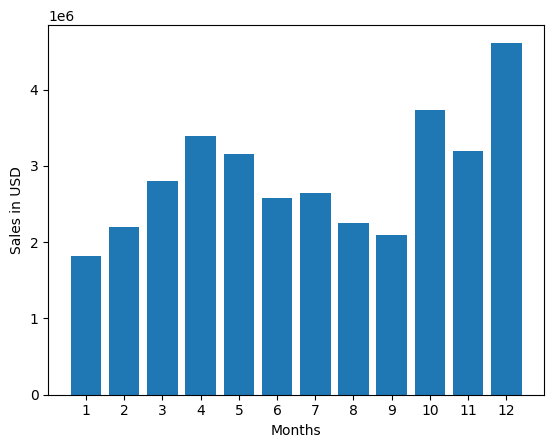

In [ ]:
months = range(1,13)
plt.bar(x=months,height=sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

### Task 3.2: What city has the best value

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [ ]:
address_city = lambda address:address.split(',')[1]
df['City'] = df['Purchase Address'].apply(address_city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [ ]:
df.groupby('City').sum()['Sales']

City
Atlanta          2795498.50
Austin           1819581.75
Boston           3661642.00
Dallas           2767975.50
Los Angeles      5452571.00
New York City    4664317.50
Portland         2320490.50
San Francisco    8262204.00
Seattle          2747755.50
Name: Sales, dtype: float32

In [ ]:
sales_value_city = df.groupby('City').sum()['Sales']
type(sales_value_city)

pandas.core.series.Series

In [ ]:
sales_value_city

City
Atlanta          2795498.50
Austin           1819581.75
Boston           3661642.00
Dallas           2767975.50
Los Angeles      5452571.00
New York City    4664317.50
Portland         2320490.50
San Francisco    8262204.00
Seattle          2747755.50
Name: Sales, dtype: float32

In [ ]:
cities = [city for city,sale in sales_value_city.items()]
cities

[' Atlanta',
 ' Austin',
 ' Boston',
 ' Dallas',
 ' Los Angeles',
 ' New York City',
 ' Portland',
 ' San Francisco',
 ' Seattle']

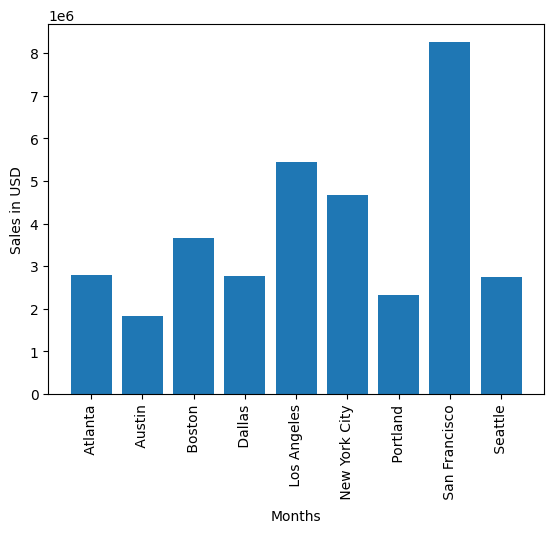

In [ ]:
cities = [city for city,sale in sales_value_city.items()]
plt.bar(cities, sales_value_city )
plt.xticks(cities,rotation = 90)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

### Task 3.3: What time should we display ads to maximize the likelihood of customer's buying product?


In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\Tan Thien\AppData\Local\Temp\ipykernel_5316\3072535395.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [ ]:
df['Hours']=df['Order Date'].dt.hour

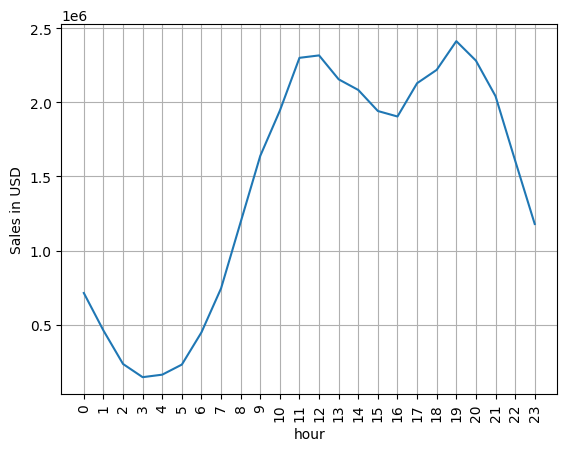

In [ ]:
sales_value_Hours = df.groupby('Hours')['Sales'].sum()
hour = [hour for hour,sale in sales_value_Hours.items()]
plt.plot(hour, sales_value_Hours )
plt.grid()
plt.xticks(hour,rotation = 90)
plt.xlabel('hour')
plt.ylabel('Sales in USD')
plt.show()

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [ ]:
sales_value_Hours = df.groupby('Hours')['Sales'].count()
sales_value_Hours.head()

Hours
0    3910
1    2350
2    1243
3     831
4     854
Name: Sales, dtype: int64

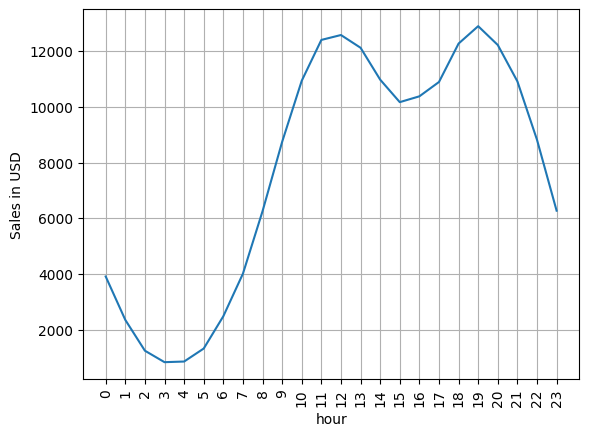

In [ ]:
sales_value_Hours = df.groupby('Hours')['Sales'].count()
hour = [hour for hour,sale in sales_value_Hours.items()]
plt.plot(hour, sales_value_Hours )
plt.grid()
plt.xticks(hour,rotation = 90)
plt.xlabel('hour')
plt.ylabel('Sales in USD')
plt.show()

### Task 3.4: What products are most often sold together?

In [ ]:
df_dup= df[df['Order ID'].duplicated(keep=False)]
df_dup

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11
...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",09,Atlanta,20
11639,259314,Wired Headphones,1,11.99,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,Atlanta,0
11640,259314,AAA Batteries (4-pack),2,2.99,5.98,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,Atlanta,0
11677,259350,Google Phone,1,600.00,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",09,San Francisco,13


In [ ]:
GroupProduct = lambda product: ','.join(product)

In [ ]:
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(GroupProduct)
df_dup.head()

C:\Users\Tan Thien\AppData\Local\Temp\ipykernel_5316\80919008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(GroupProduct)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All Products
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11,"Vareebadd Phone,Wired Headphones"


In [ ]:
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup.head()

,Order ID,All Products
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [ ]:
df_dup[['Order ID', 'All Products']].drop_duplicates() 

,Order ID,All Products
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [ ]:
df_dup['All Products'].value_counts().head(10)

All Products
iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     77
Vareebadd Phone,Bose SoundSport Headphones             60
Name: count, dtype: int64

### Task 3.5: What product sold the most ? Why do you think it sold the most

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [ ]:
all_products = df.groupby('Product')['Quantity Ordered'].sum()
all_products

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [ ]:
prices = df.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.990021
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.990021
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

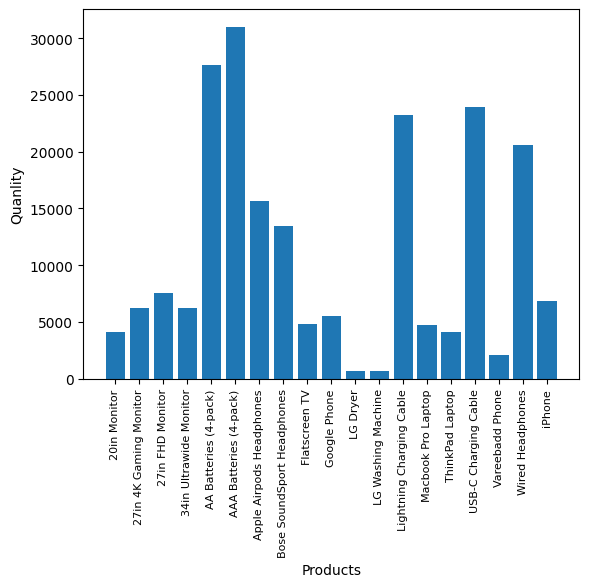

In [ ]:
product_ls = [product for product,quant in all_products.items()]
plt.bar(x= product_ls, height=all_products)
plt.xticks(product_ls, rotation = 90,size = 8)
plt.xlabel('Products')
plt.ylabel('Quanlity')
plt.show();

C:\Users\Tan Thien\AppData\Local\Temp\ipykernel_5316\857821639.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(product_ls, rotation = 90, size = 8)


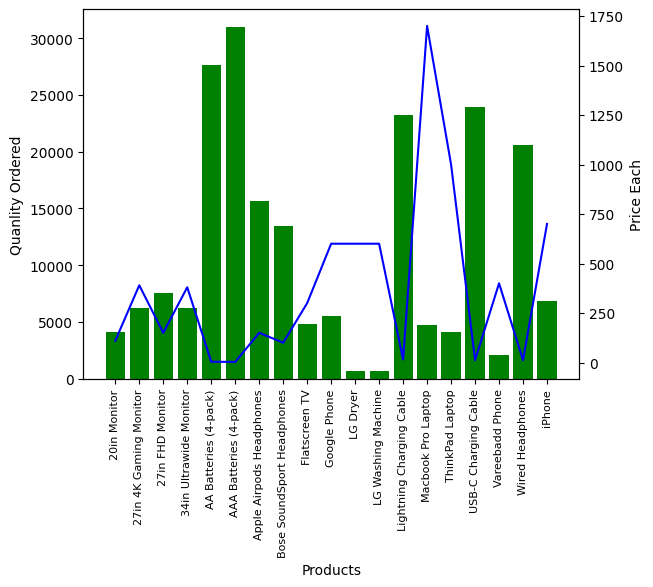

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
bar = ax1.bar(x= product_ls, height=all_products,color = 'green')
plot = ax2.plot(product_ls, prices,color = 'blue') 
ax1.set_xticklabels(product_ls, rotation = 90, size = 8)
ax1.set(xlabel = 'Products',
        ylabel = 'Quanlity Ordered')
ax2.set(ylabel = 'Price Each');

